<a href="https://colab.research.google.com/github/NehaSijaria/Data-Analyst---Capstone/blob/main/M4DataVisualization_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [90]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-04-11 12:49:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  33.6MB/s    in 1.0s    

2024-04-11 12:49:23 (33.6 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [91]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [92]:
import pandas as pd

In [93]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [94]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [95]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [96]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [97]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


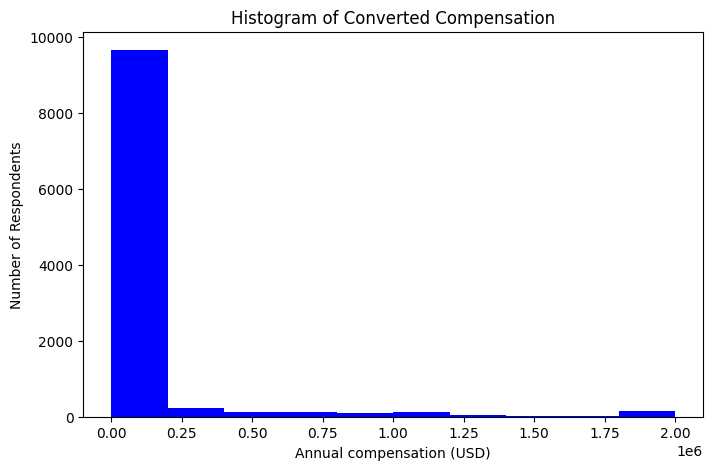

In [98]:
QUERY = """
SELECT Respondent, ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

# plot histogram
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5), color='blue', xlabel = 'Annual compensation (USD)',
                         ylabel = "Number of Respondents", title="Histogram of Converted Compensation")

plt.show()

### Box Plots


Plot a box plot of `Age.`


[Text(1, 0, 'All Respondents')]

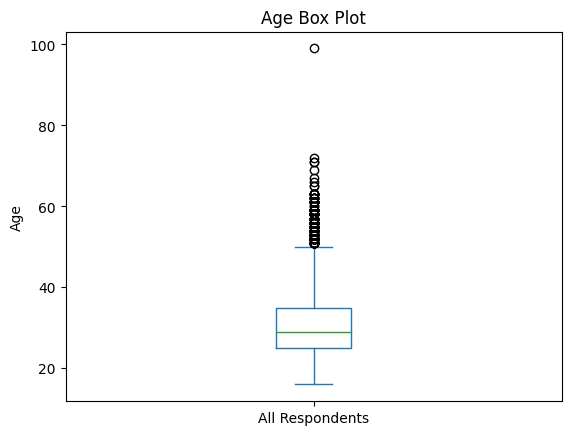

In [99]:
# your code goes here
Q = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(Q, conn)
ax = df.plot(kind="box", ylabel="Age", title="Age Box Plot")
ax.set_xticklabels(["All Respondents"])


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Axes: title={'center': 'Weekly Hours Wkd x Respondent Age'}, xlabel='Age', ylabel='Avg Hours/Week'>

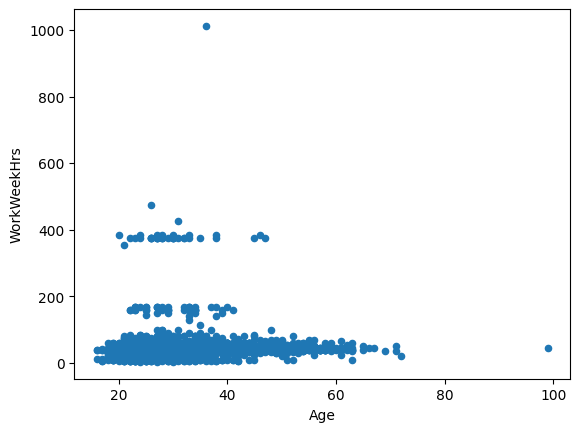

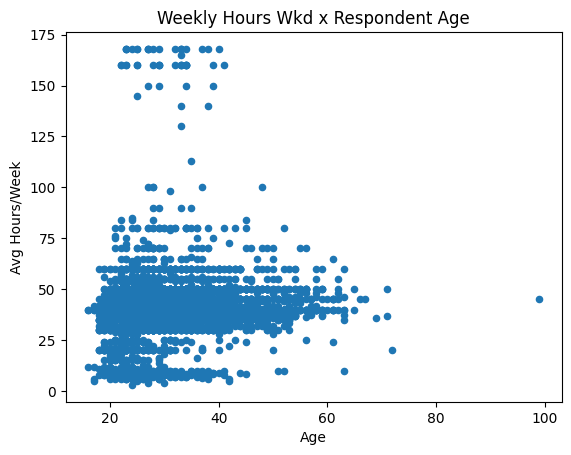

In [100]:
# your code goes here
Q = """
SELECT Age,
    WorkWeekHrs
FROM MASTER
"""

df = pd.read_sql_query(Q, conn)
df.plot(kind="scatter", x="Age", y="WorkWeekHrs")
# WorkWeekHrs shouldn't be higher than 168 (24hrs x 7 days a week) so lets remove those outliers
df[df["WorkWeekHrs"] <= 168].plot(
    kind="scatter",
    x="Age",
    y="WorkWeekHrs",
    ylabel="Avg Hours/Week",
    title="Weekly Hours Wkd x Respondent Age",
)


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


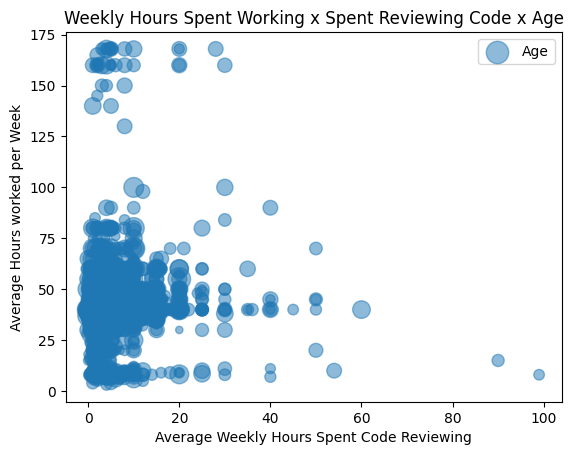

In [101]:
# your code goes here
Q = """
SELECT Age,
    WorkWeekHrs,
    CodeRevHrs
FROM MASTER
"""

df = pd.read_sql_query(Q, conn)

df = df[df["WorkWeekHrs"] <= 168]

age_norm = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())


ax = df.plot(
    kind="scatter",
    x="CodeRevHrs",
    y="WorkWeekHrs",
    alpha=0.5,
    s=age_norm * 500 + 10,
    ylabel="Average Hours worked per Week",
    xlabel="Average Weekly Hours Spent Code Reviewing",
    title="Weekly Hours Spent Working x Spent Reviewing Code x Age",
)
ax.legend(["Age"], loc="upper right")


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


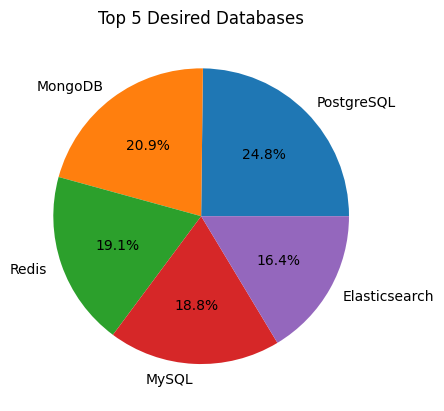

In [102]:
# your code goes here


Q = """
SELECT DatabaseDesireNextYear,
    COUNT(*) AS COUNT
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT DESC
"""

df = pd.read_sql_query(Q, conn)
df = df.head().set_index("DatabaseDesireNextYear")
ax = df.plot(
    kind="pie",
    y="COUNT",
    autopct="%1.1f%%",
    ylabel="",
    legend=False,
    title="Top 5 Desired Databases",
)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Axes: title={'center': 'Median Hours Worked and Hours Spent Code Reviewing per Week by Age'}, xlabel='Age', ylabel='Hours'>

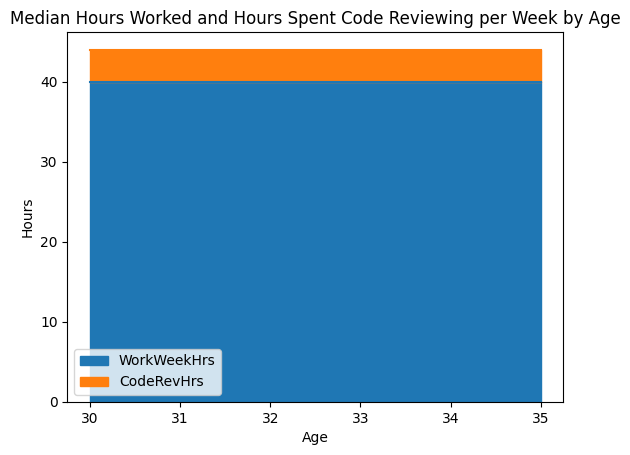

In [103]:
# your code goes here

Q = """
SELECT WorkWeekHrs,
    CodeRevHrs,
    Age
FROM MASTER
WHERE WorkWeekHrs <= 168
    AND Age >= 30
    AND Age <= 35
"""
df = pd.read_sql_query(Q, conn)

df_grp = df.groupby("Age").median().reset_index()
df_grp.plot(
    kind="area",
    x="Age",
    stacked=True,
    title="Median Hours Worked and Hours Spent Code Reviewing per Week by Age",
    ylabel="Hours",
)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Axes: title={'center': 'Median Salary 45-60 age'}, xlabel='Age', ylabel='Yearly Salary (USD)'>

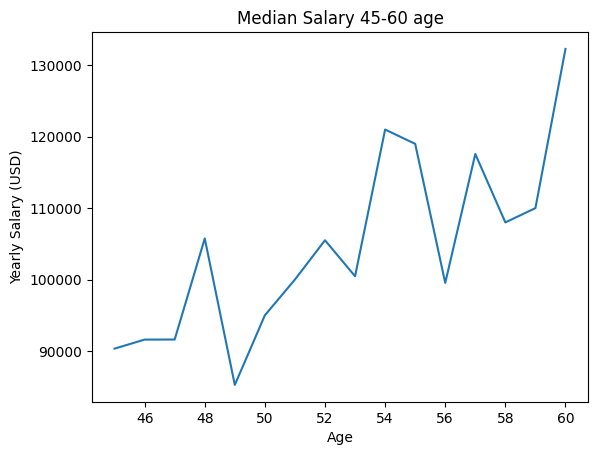

In [104]:
# your code goes here
import pandas as pd


Q = """
SELECT ConvertedComp,
    Age
FROM MASTER
WHERE Age >= 45
    AND Age <= 60
"""
df = pd.read_sql_query(Q, conn)

df_grp = df.groupby("Age").median().reset_index()
df_grp.plot(
    kind="line",
    x="Age",
    y="ConvertedComp",
    title="Median Salary 45-60 age",
    ylabel="Yearly Salary (USD)",
    legend=False,
)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


,MainBranch,COUNT
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


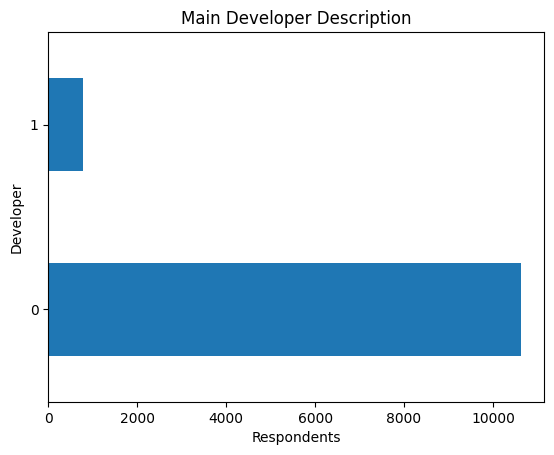

In [105]:
# your code goes here

Q10 = """
SELECT MainBranch,
    COUNT(*) AS COUNT
FROM MASTER
GROUP BY MainBranch
"""
df = pd.read_sql_query(Q10, conn)

df.plot(
    kind="barh",
    xlabel="Respondents",
    ylabel="Developer",
    title="Main Developer Description",
    legend=False
)
df


Close the database connection.


In [106]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
